In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 
import ROOT
import Functions

In [75]:
def exp(x,a,b,c):
    return np.exp(-x/b)*a+c
def frontselect(lista, fronte=0):
    result = []
    for i in lista:
        if i[2]==fronte:
            result.append(i)
    return result
def convtime(x, a=1.044, b= -159):
    return a*x+b
def fromhist(x):
    l = len(x)
    xnew = []
    for i in range(l-1):
        xnew.append((x[i]+x[i+1])/2)
    return xnew

0 leading
1 trailing

In [112]:
df = pd.DataFrame(columns= ["Canale 0","Canale 3","Canale 4","Canale 6","Canale 8" ])
fname = r"Prese_dati/presadati_270623_1615.txt"
file = open(fname, "r")
n = 0
q = 0
col = 0
car = 0
locdict = {}
events = []
for f in file: 
    #print(f)
    #print(df)
    if q ==4:#parte di programma che mette il dizionario nella lista
        k = locdict.keys()
        for h in k:
            lista = locdict[h]
            lista_int= [int(y) for y in lista]
            events.append(lista_int)
        #for nr in k: ci ho un po' provato a mettere nel dataframe, senza successo. Per ora ci basta pensare alla lista
            
           # try:
           #     print("GOING")
           #     print(locdict[nr])
           #     print(df)
           #     df.loc[len(df), "event"+str(nr)] = locdict[nr]
           # except KeyError:
           #     print("AIUTO")
           #     cose = [np.nan for i in range(len(df.index))]
           #     toadd = cose+locdict[nr]
           #     title = "event "+str(nr)
           #     df[title] = toadd
                
        locdict = {}
        q = 0
        col =0
    for i in range(len(f)):
        #print(locdict)
        #print("f_i="+str(f[i]))
        #print("col="+str(col))
        #print("car="+str(car))
        #print("q"+str(q))
        if f[i] == "\n":
            q+=1
            col = 0
            car = 0            
            n+=1
            break
        elif f[i] == "\t":
            col += 1
            car =0 
        else:
            if car ==0 and q == 0:
                locdict[col]=[f[i]]
                car= 1
            elif car ==0:
                locdict[col].append(f[i])
                car +=1
            else:
                #print(locdict)
                locdict[col][q]+=f[i]
                car+=1
                
                
            

file.close()


In [113]:
print(n)

2663636


In [114]:

dict_tot= {}
for ev in events:
    ev[3]= convtime(ev[3])
    if ev[1] not in dict_tot.keys():
        dict_tot[ev[1]]= [ev]
    else:
        dict_tot[ev[1]].append(ev)

## Legenda per i vari canali
* 0 Up
* 3 CsI
* 4 Down
* 6 Coincidenza (110)
* 8 Coincidenza (01X)

## Scintillatore up

leading


In [115]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

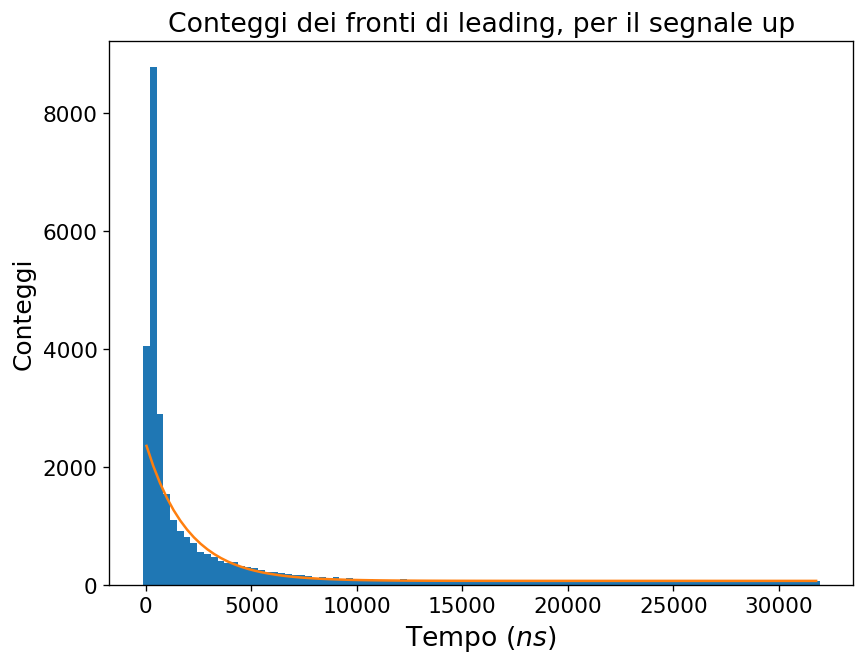

In [116]:
plt.figure(figsize=(8,6), dpi = 120)
#plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 16)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
up_0 = frontselect(dict_tot[0],0)
up0_t = [i[3] for i in up_0]
plt.title("Conteggi dei fronti di leading, per il segnale up", fontsize = 16)
yup0,xup0, oup0 = plt.hist(up0_t, bins =100)
xup0_adapt = fromhist(xup0)
valup, covup = curve_fit(exp, xup0_adapt[2:],yup0[2:], (5000,3000,100),[np.sqrt(i) for i in yup0[2:]])
plt.plot(xup0_adapt, [exp(i, valup[0], valup[1], valup[2]) for i in xup0_adapt])
plt.show()

In [117]:
sum (yup0)

31085.0

[1]
671.7369000000001


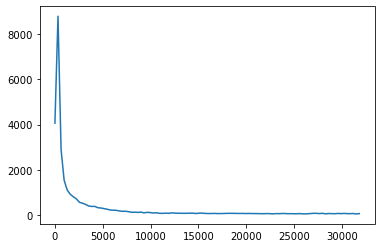

In [118]:
plt.plot(xup0_adapt, yup0)
m = max(yup0)
print(np.where(yup0 == m)[0])
print(xup0_adapt[2])

In [119]:
lim = 10000
yup0_sel =[]
for i in up0_t:
    if i<lim:
        yup0_sel.append(i)

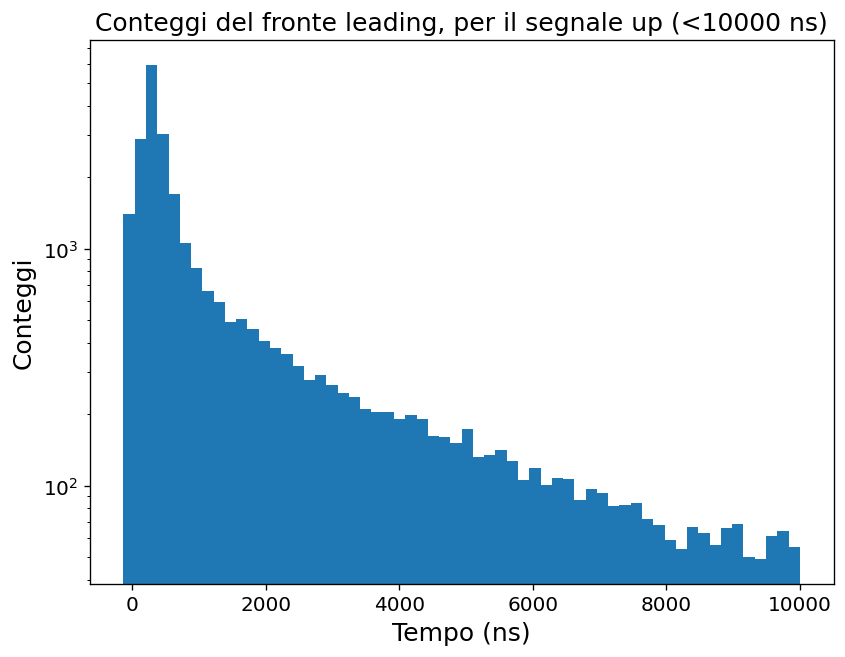

In [120]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yscale("log")
plt.yticks(fontsize = 12)
yselup0, xselup0, qqqqq = plt.hist(yup0_sel, bins = 60)
plt.title("Conteggi del fronte leading, per il segnale up (<"+str(lim)+" ns)", fontsize = 15)
plt.show()

In [121]:
sum(yselup0)/sum(yup0)

0.8577127231783819

trailing


In [122]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

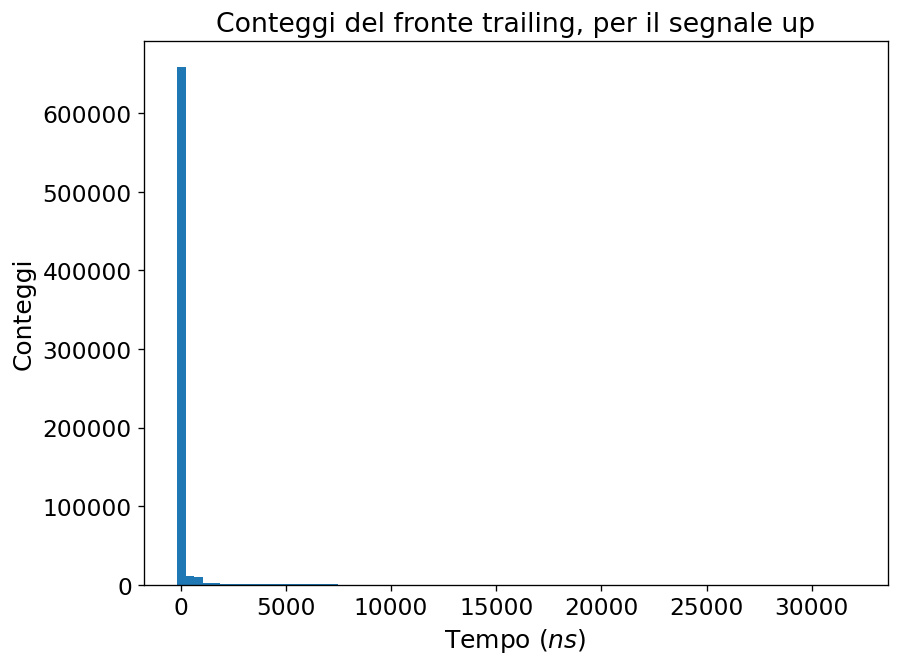

In [123]:
plt.figure(figsize=(8,6), dpi = 120)
#plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
up_1 = frontselect(dict_tot[0],1)
up1_t = [i[3] for i in up_1]
plt.title("Conteggi del fronte trailing, per il segnale up", fontsize = 16)
yup1,xup1, oup1 = plt.hist(up1_t, bins =80)
plt.show()


In [124]:
lim = 600
yup1_sel =[]
for i in up1_t:
    if i<lim:
        yup1_sel.append(i)

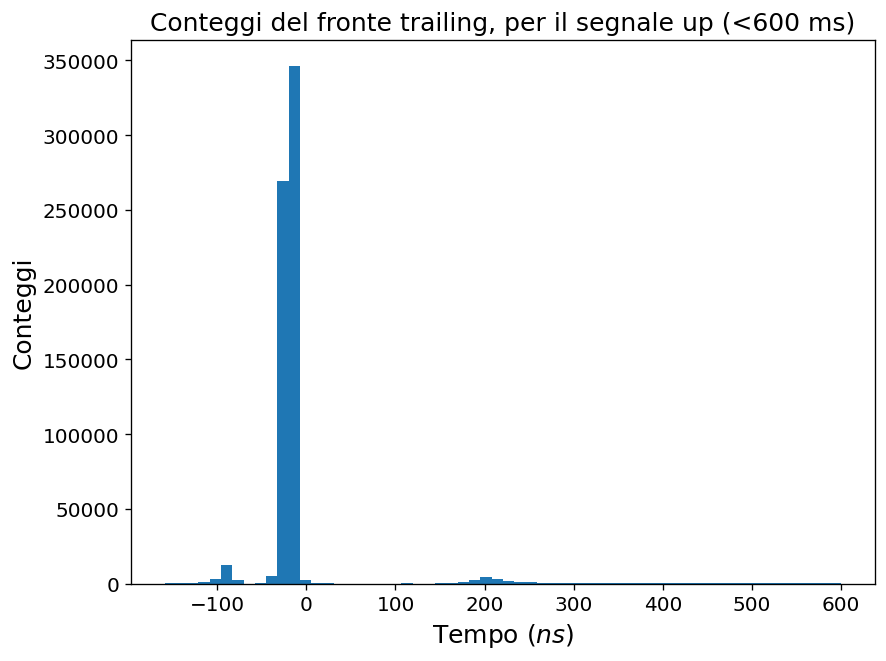

In [125]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
yselup1, xselup1, qqqqq1 = plt.hist(yup1_sel, bins = 60)
plt.title("Conteggi del fronte trailing, per il segnale up (<"+str(lim)+" ms)", fontsize = 15)
plt.show()

In [126]:
sum(yselup1)/sum(yup1)

0.9611318425811637

## Analisi CSI


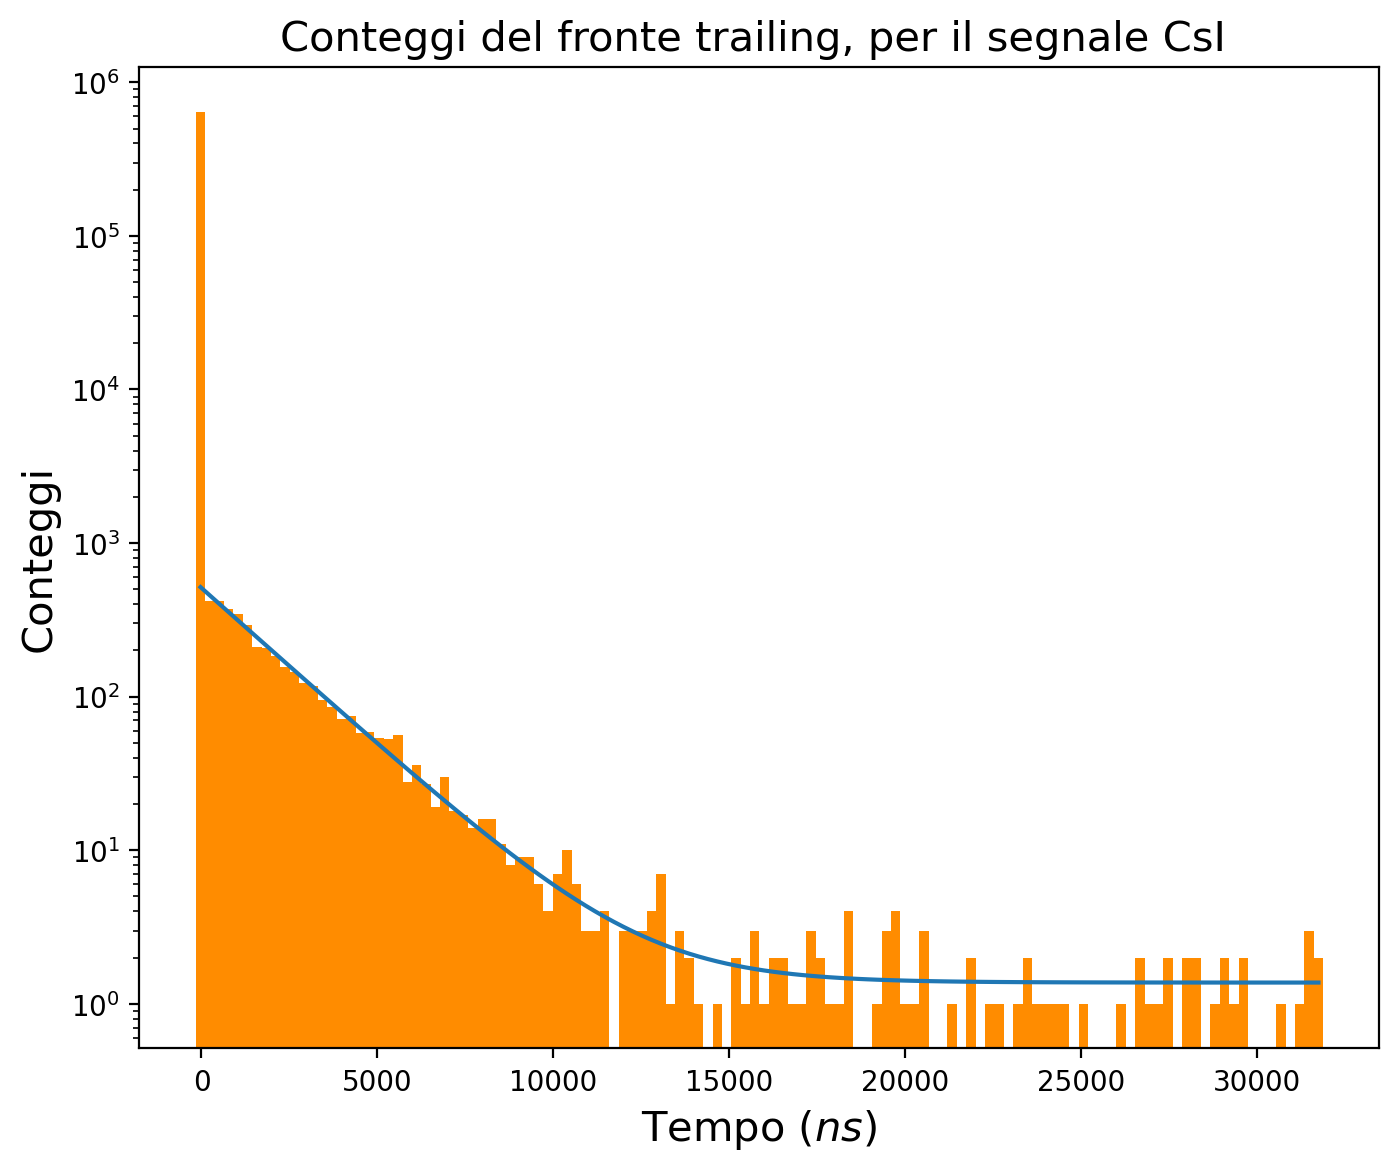

In [127]:
plt.figure(figsize=(8,6.5), dpi = 200)
csi = frontselect([i for i in dict_tot[3]],1)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.yscale("log")
ycsi,xcsi, ocsi = plt.hist([i[3] for i in csi], bins =120, color = "darkorange")
plt.title("Conteggi del fronte trailing, per il segnale CsI ", fontsize = 15)
p_csi, s_csi = curve_fit(exp, fromhist(xcsi)[1:], ycsi[1:], (30000,2000,10))
plt.plot(fromhist(xcsi), [exp(i, *p_csi) for i in fromhist(xcsi) ])
plt.show()

In [128]:
sum(ycsi)

649233.0

Adesso seleziono solo i csi sotto i 10, e vediamo quanto rappresentano del totale


4.216205204200294

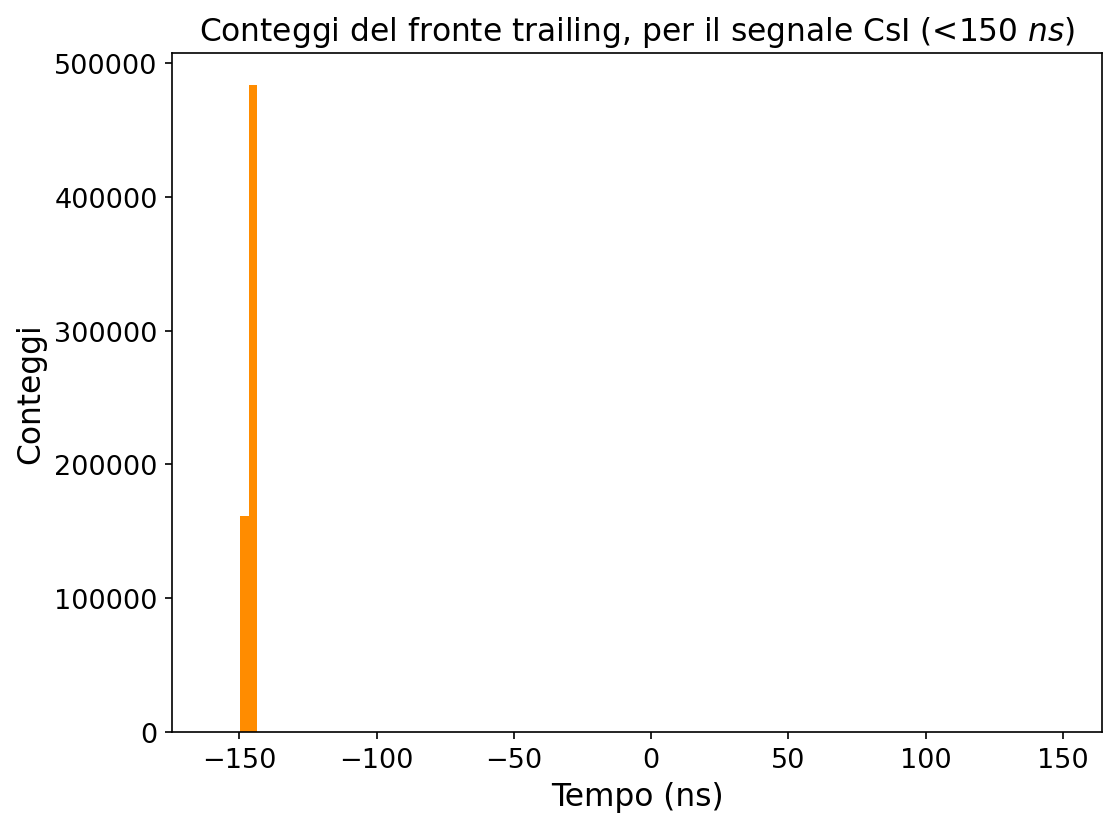

In [129]:
csi_selected = []
lim = 150
for i in csi:
    if i[3]<lim:
        csi_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 150)
csisy, csix, otcsh= plt.hist(csi_selected, color = "darkorange", bins = 100)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte trailing, per il segnale CsI (<"+str(lim)+" $ns$)", fontsize = 15)

np.std(csi_selected)

In [130]:
sum(csisy)/sum(ycsi)

0.9939282199148842

Insomma il 99% degli eventi è sotto i 10. 

## Down scint

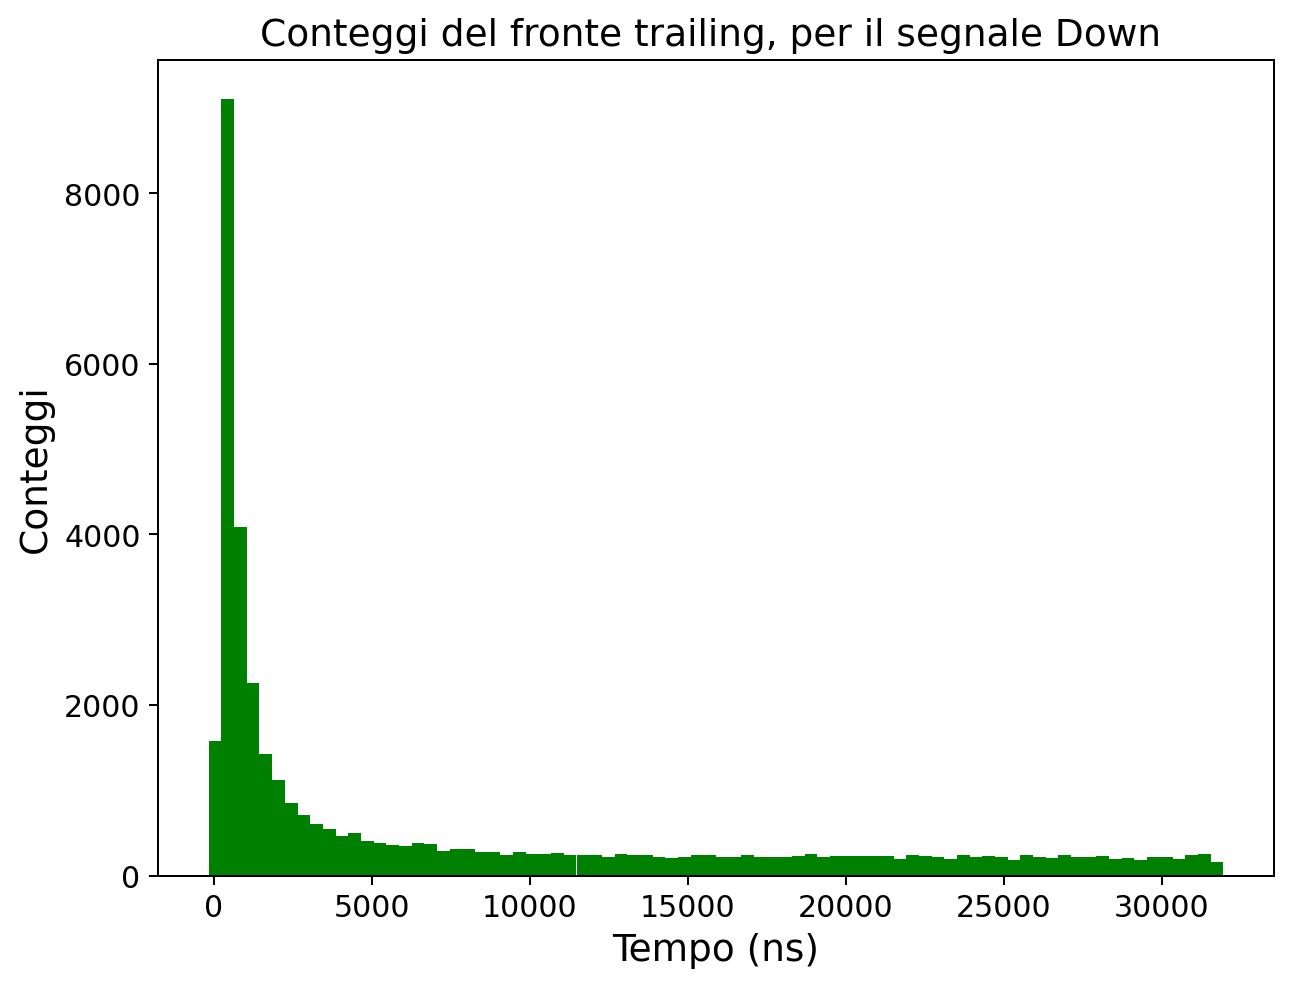

In [131]:
plt.figure(figsize=(8,6), dpi = 180)
downs= frontselect([i for i in dict_tot[4]],1)

ydw,xdw, odw = plt.hist([i[3] for i in downs], bins =80, color = "green")
plt.title("Conteggi del fronte trailing, per il segnale Down ", fontsize = 15)

#plt.yscale("log")
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
p_dw, s_dw = curve_fit(exp, fromhist(xdw)[1:], ydw[1:], (30000,2000,10), [np.sqrt(i) for i in ydw[1:] ])
#plt.plot(fromhist(xdw), [exp(i, *p_dw) for i in fromhist(xdw) ], color= "red")
plt.show()

In [132]:
p_dw

array([14636.99857164,   701.27169532,   240.77774062])

Text(0.5, 1.0, 'Conteggi del fronte leading, per il segnale Down (<10000 $ns$)')

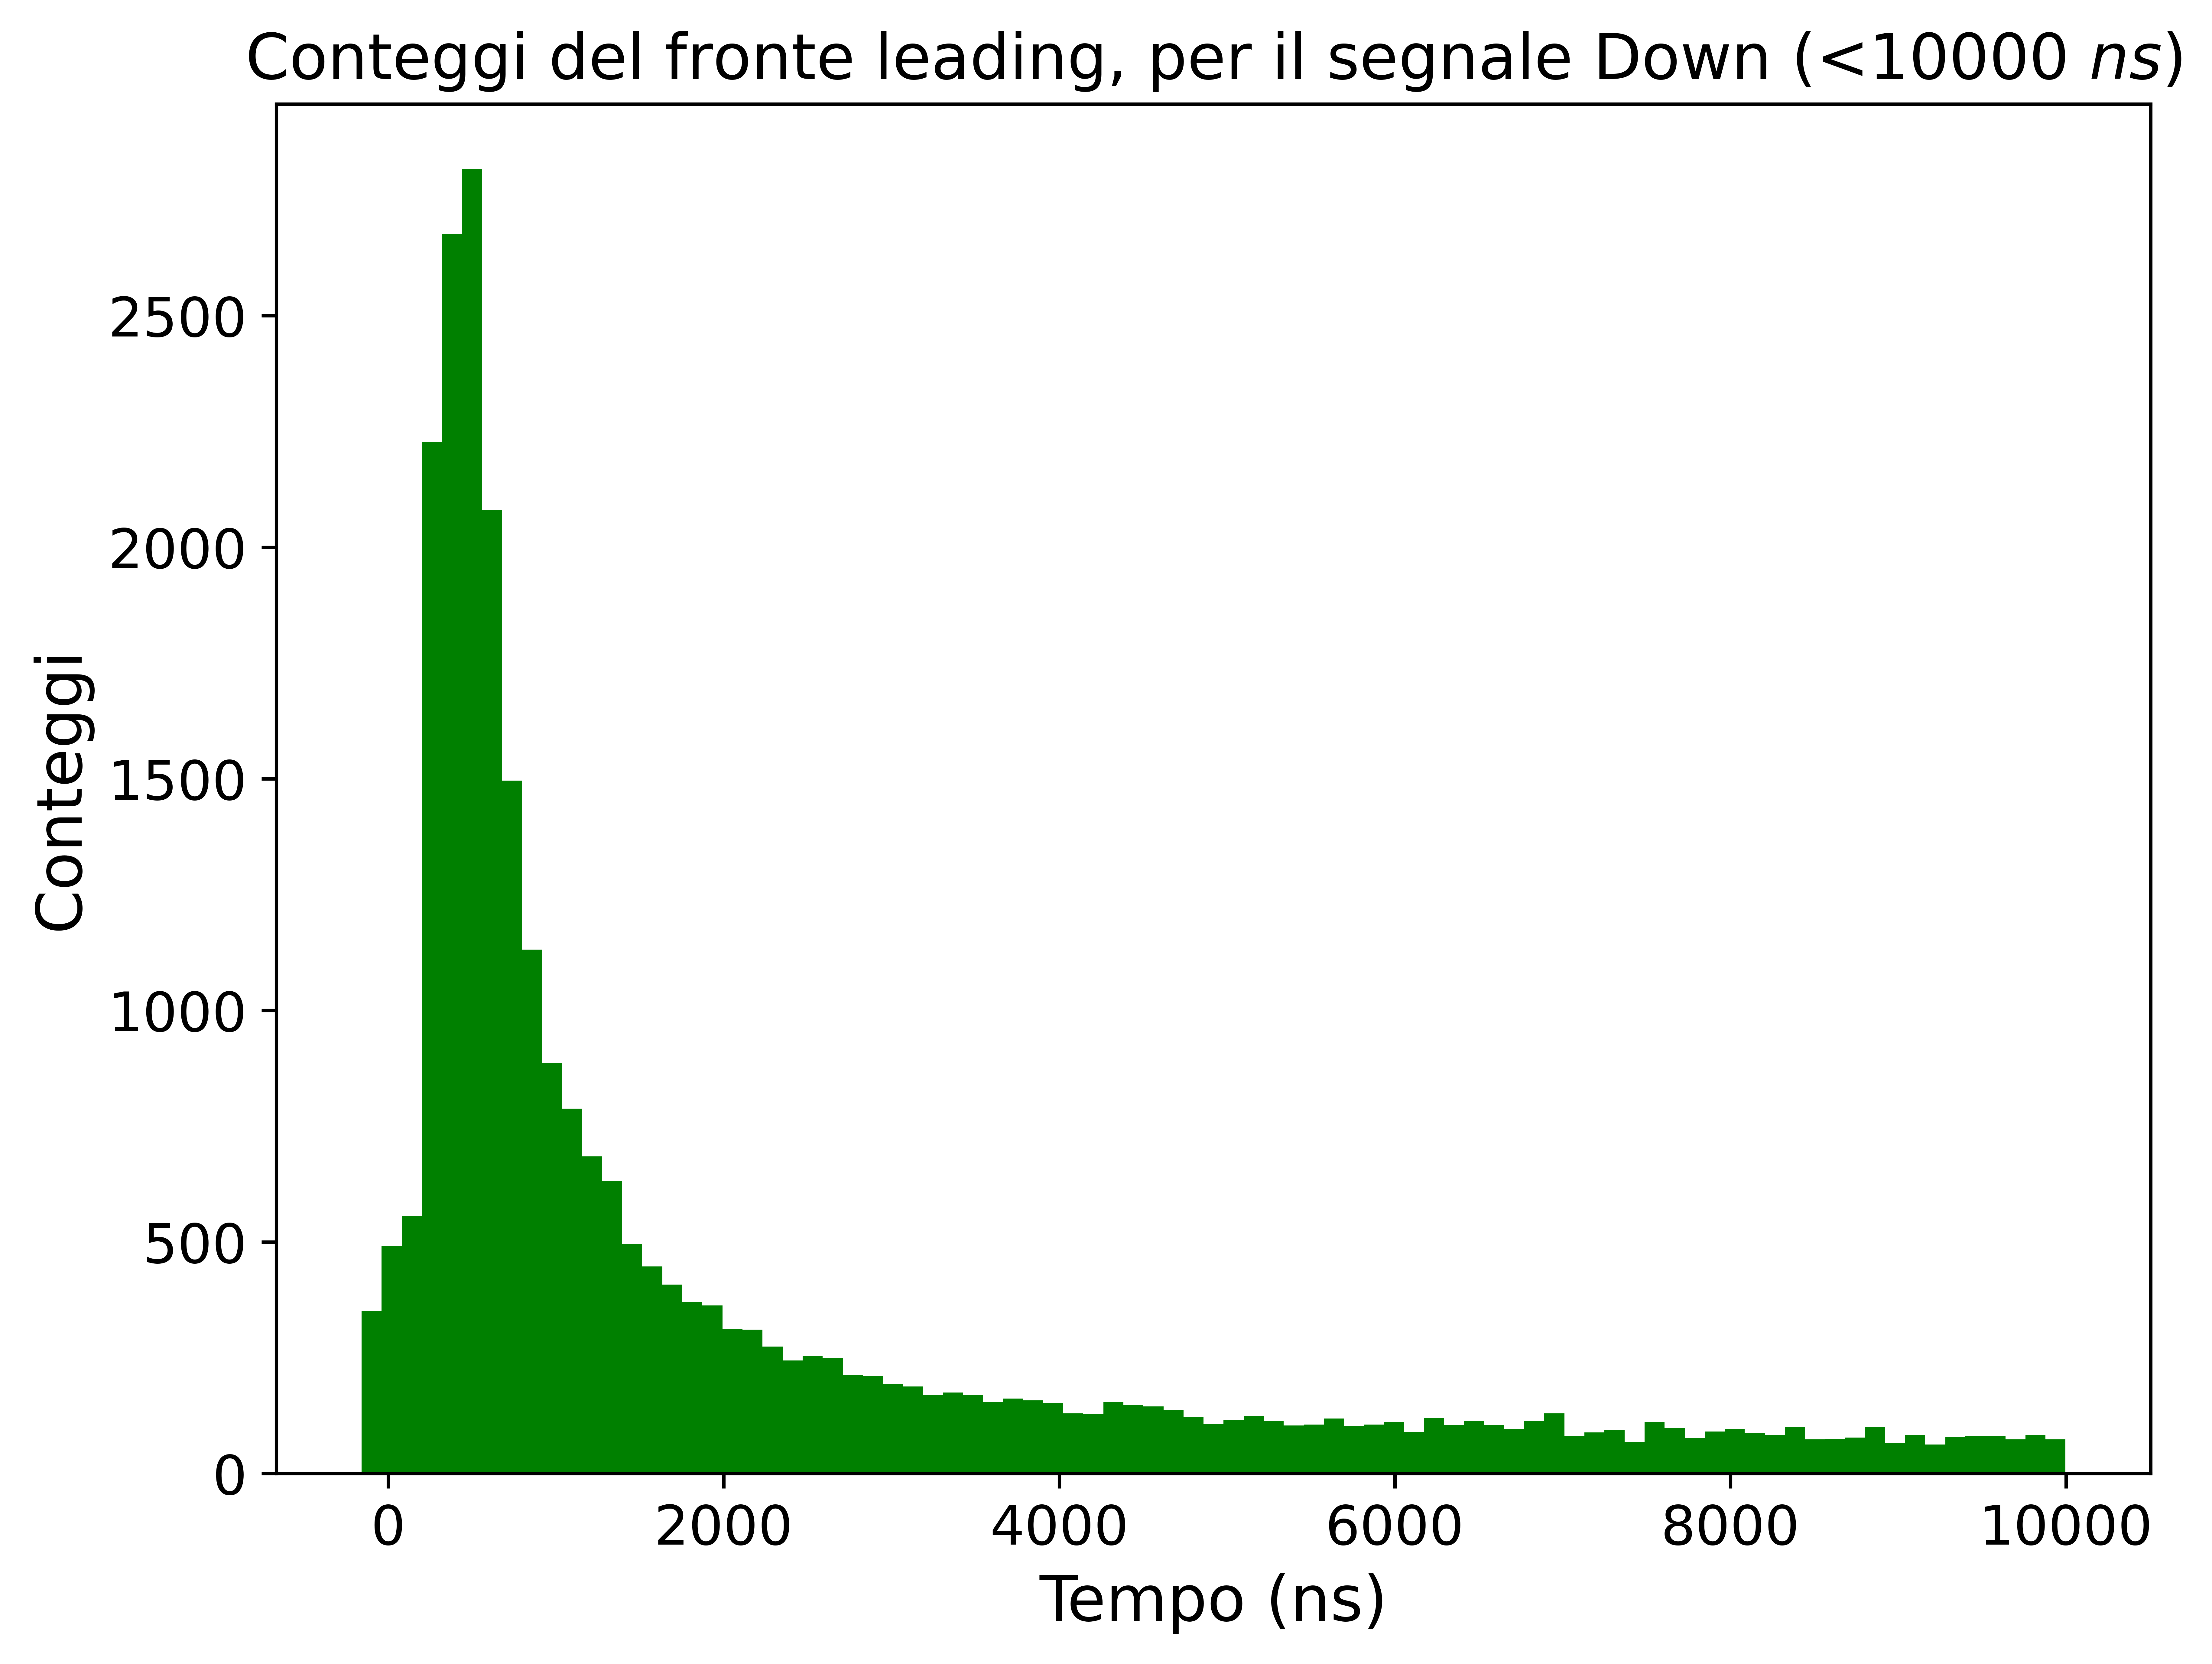

In [133]:
dw_selected = []
lim = 10000
for i in downs:
    if i[3]<lim:
        dw_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 1000)
dwsy, dwsx, otcsh= plt.hist(dw_selected, color = "green", bins = 85)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte leading, per il segnale Down (<"+str(lim)+" $ns$)", fontsize = 15)


In [134]:
sum(dwsy)/sum(ydw)

0.6931712351179239

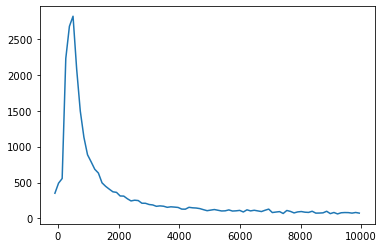

In [135]:
plt.plot(fromhist(dwsx),dwsy)

In [136]:
sum(dwsy)/sum(ydw)

0.6931712351179239

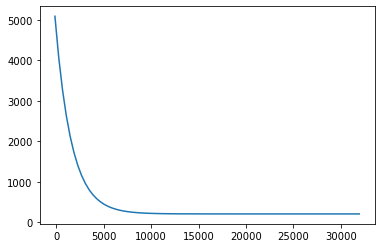

In [137]:
##### ydw,xdw, odw = plt.hist([i[3] for i in dict_tot[4]], bins =80)
paramsd, covd = curve_fit(f = exp,xdata = xdw[0:(len(xdw)-1)],ydata = ydw, p0 = (70,2000,0))
modeld = [exp(i, *paramsd) for i in xdw]
plt.plot(xdw, modeld)

In [138]:
paramsd

array([4456.76488898, 1717.57654746,  203.44653726])


## Analisi delle coincidenze


In [139]:
coinc_110 = frontselect(dict_tot[6])

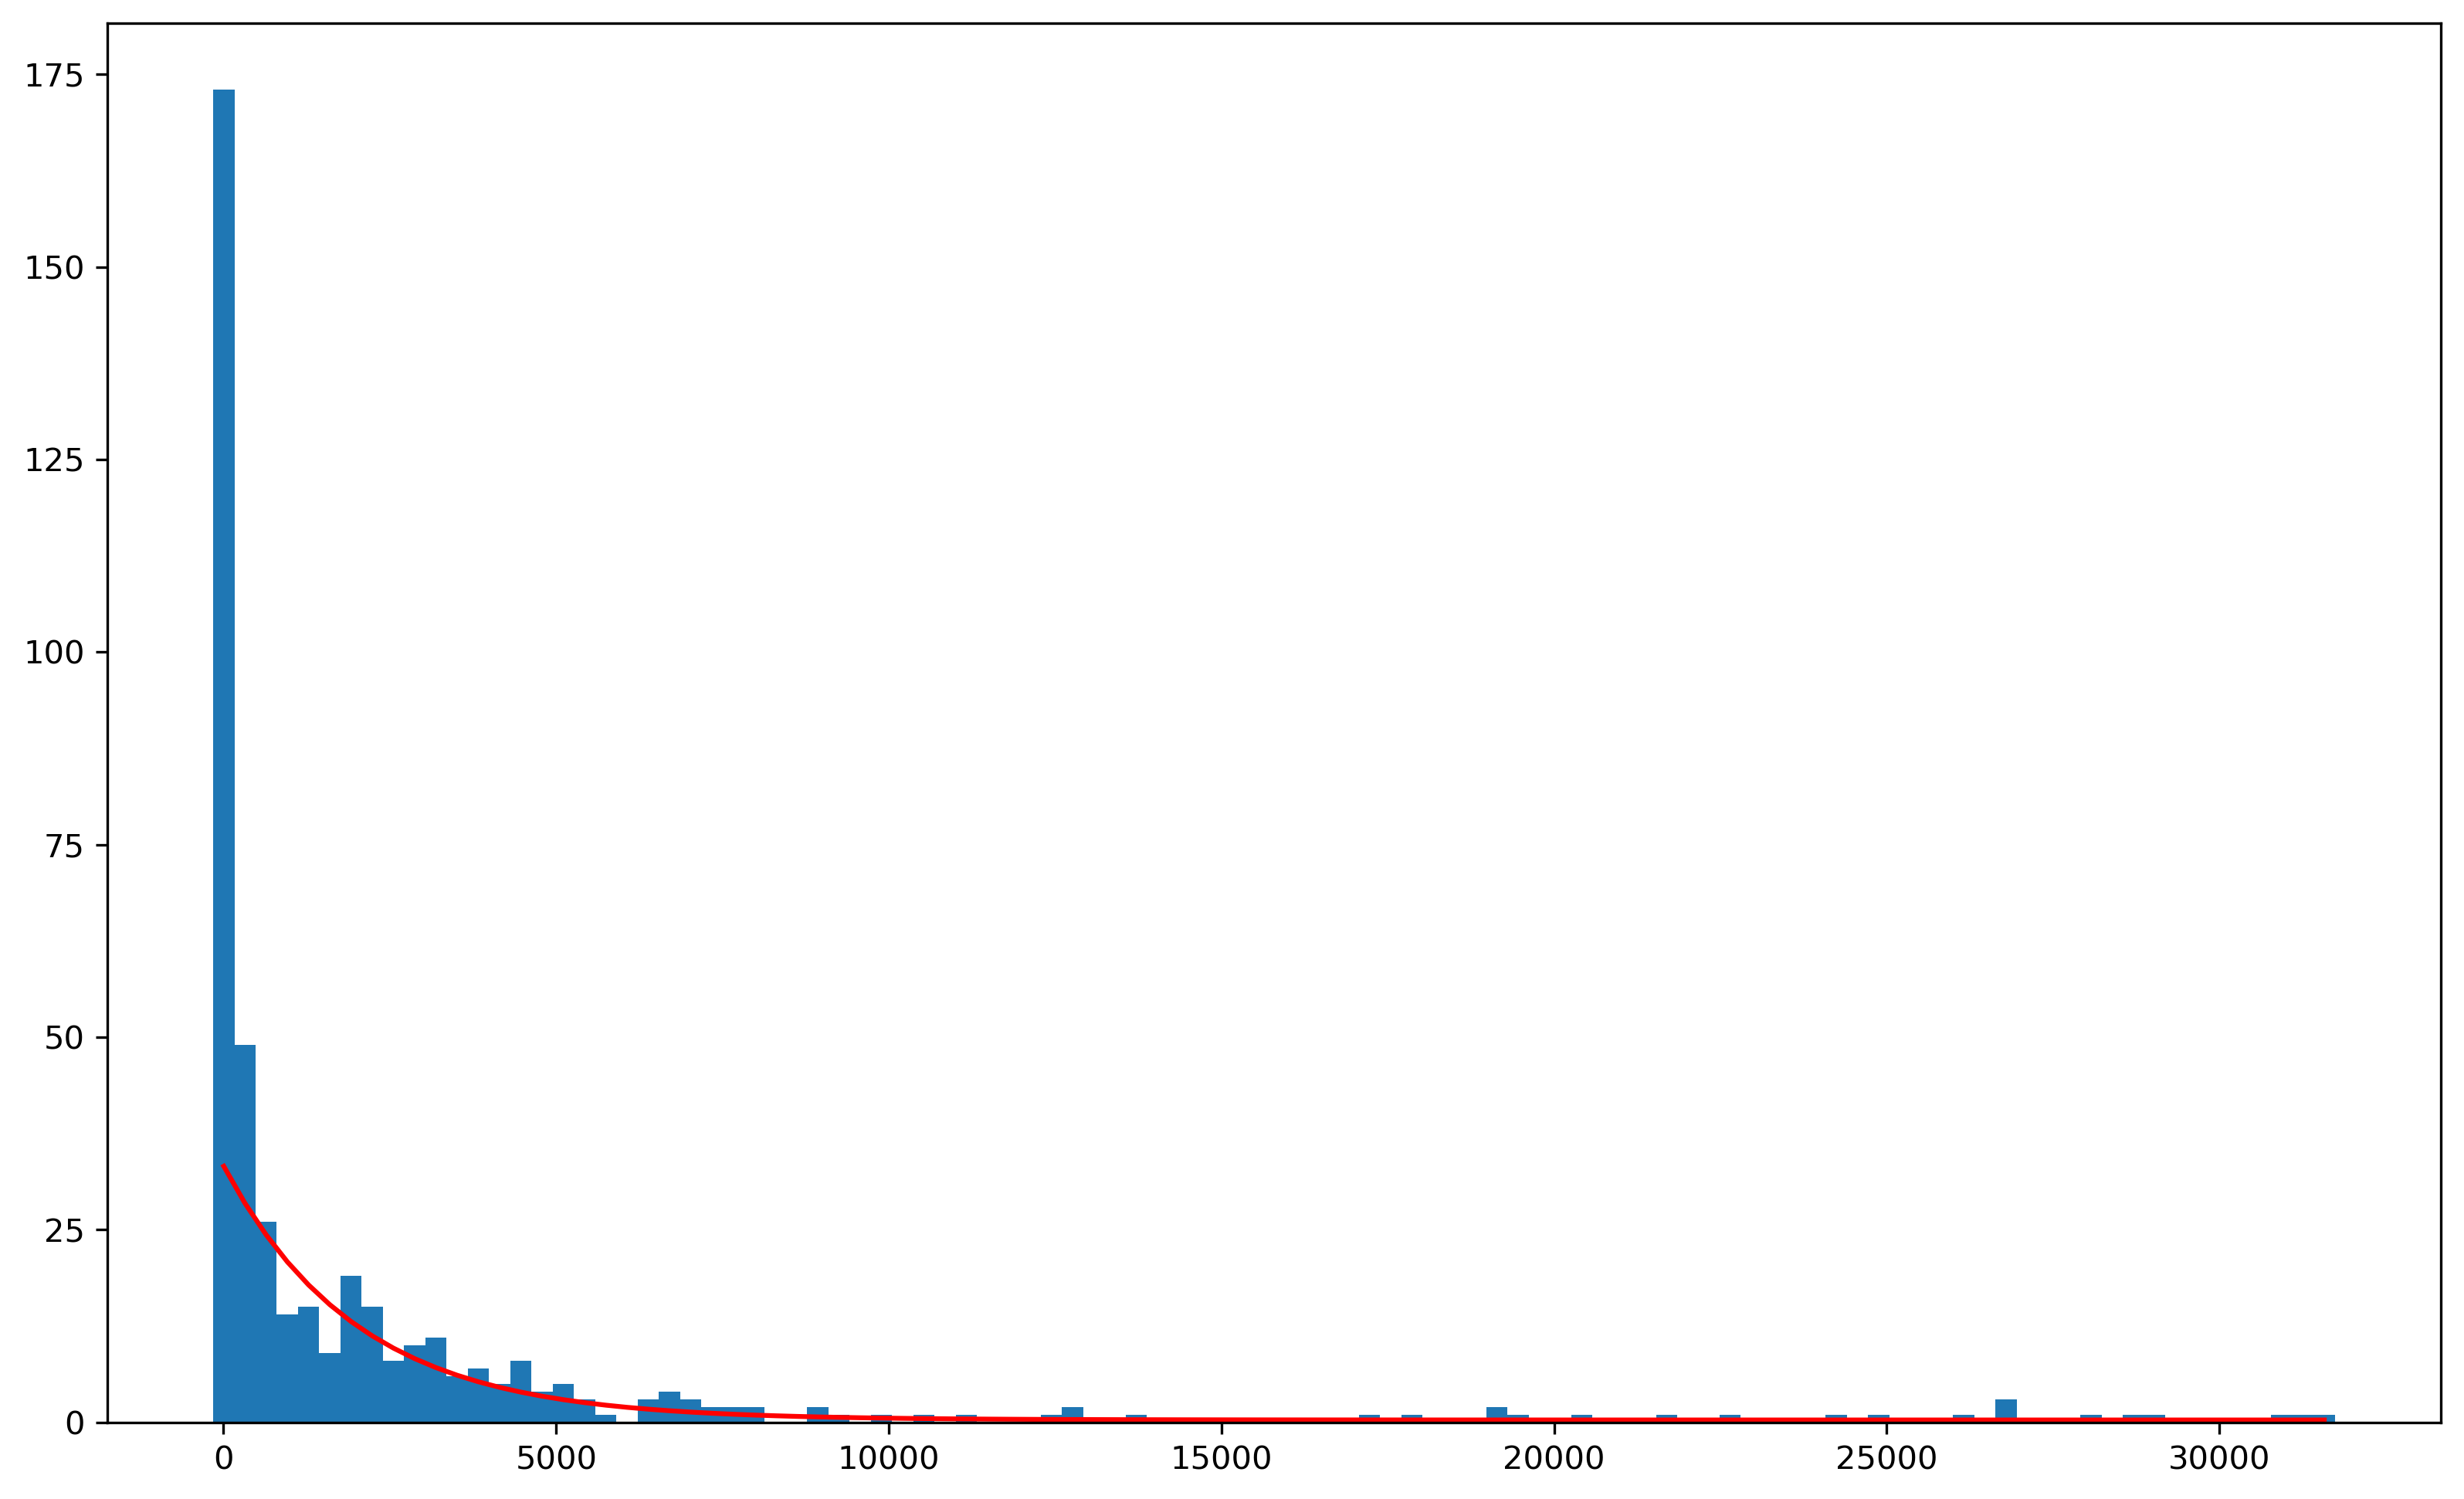

In [157]:
plt.figure(figsize=(13,8), dpi = 300)

y6,x6, o6 = plt.hist([i[3] for i in coinc_110], bins =100)
#plt.yscale("log")
N6 = sum(y6)
errs = []
for i in y6:
    if i !=0:
        errs.append(np.sqrt((i)))
    else:
        errs.append(1)

params6, cov6= curve_fit(f = exp,xdata = fromhist(x6)[1:],ydata = y6[1:], p0 = (70,2000,10), sigma = errs[1:])
plt.plot(fromhist(x6), [exp(i, *params6) for i in fromhist(x6) ], color= "red")
plt.show()

 FCN=33.9629 FROM MIGRAD    STATUS=CONVERGED     121 CALLS         122 TOTAL
                     EDM=1.54725e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.13795e+00   2.32302e-01   6.17356e-04   7.72826e-03
   2  p1           6.60257e+01   7.77805e+00   1.35079e-02   1.50191e-04
   3  p2           1.90037e+03   2.07587e+02   3.42824e-01   5.33911e-06


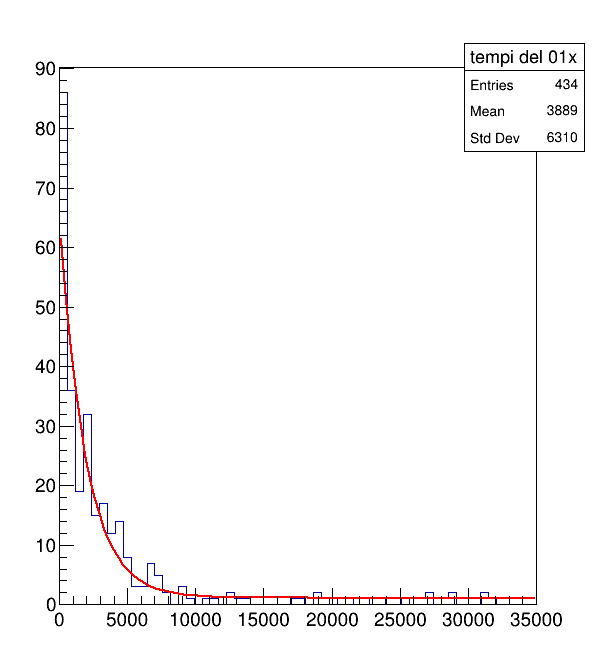

In [147]:
c1 = ROOT.TCanvas("", "", 600, 700)
f1 = ROOT.TF1("f", "[1]*e^(-x/[2])+[0]")
h1 = ROOT.TH1F("","", 60, 0, 30000)
coinc_110_l = [i[3] for i in coinc_110]
h1 = Functions.Create_histo(coinc_110_l, "tempi del 01x", 60, 0,35000)
f1.SetParameters(10, 800, 2000)
h1.Fit(f1, "S")
h1.Draw()
c1.Draw()

In [148]:
params6

array([3.29928904e+01, 2.02135918e+03, 3.17463407e-01])

In [149]:
cov6

array([[ 9.09127937e+00, -3.63599154e+02,  4.16626707e-02],
       [-3.63599154e+02,  2.45023476e+04, -5.12829499e+00],
       [ 4.16626707e-02, -5.12829499e+00,  8.91730201e-03]])

In [150]:
params6_c, cov6_c = curve_fit(f = exp,xdata = fromhist(x6)[1:11],ydata =[i-0.837 for i in  y6[1:11]], p0 = (70,2000,0), sigma = [np.sqrt(i-0.837) for i in  y6[1:11]])

In [151]:
params6_c

array([108.25508937, 311.5144695 ,  10.02964262])

Possiamo fare un fit sulle coincidenze per ottenere la vita media del muone. Per eliminare le casuali dalle coincidenze, possiamo sottrarre, ai dati il coefficiente costante ottenuto dal fit. 
Quindi 

In [152]:
params6

array([3.29928904e+01, 2.02135918e+03, 3.17463407e-01])

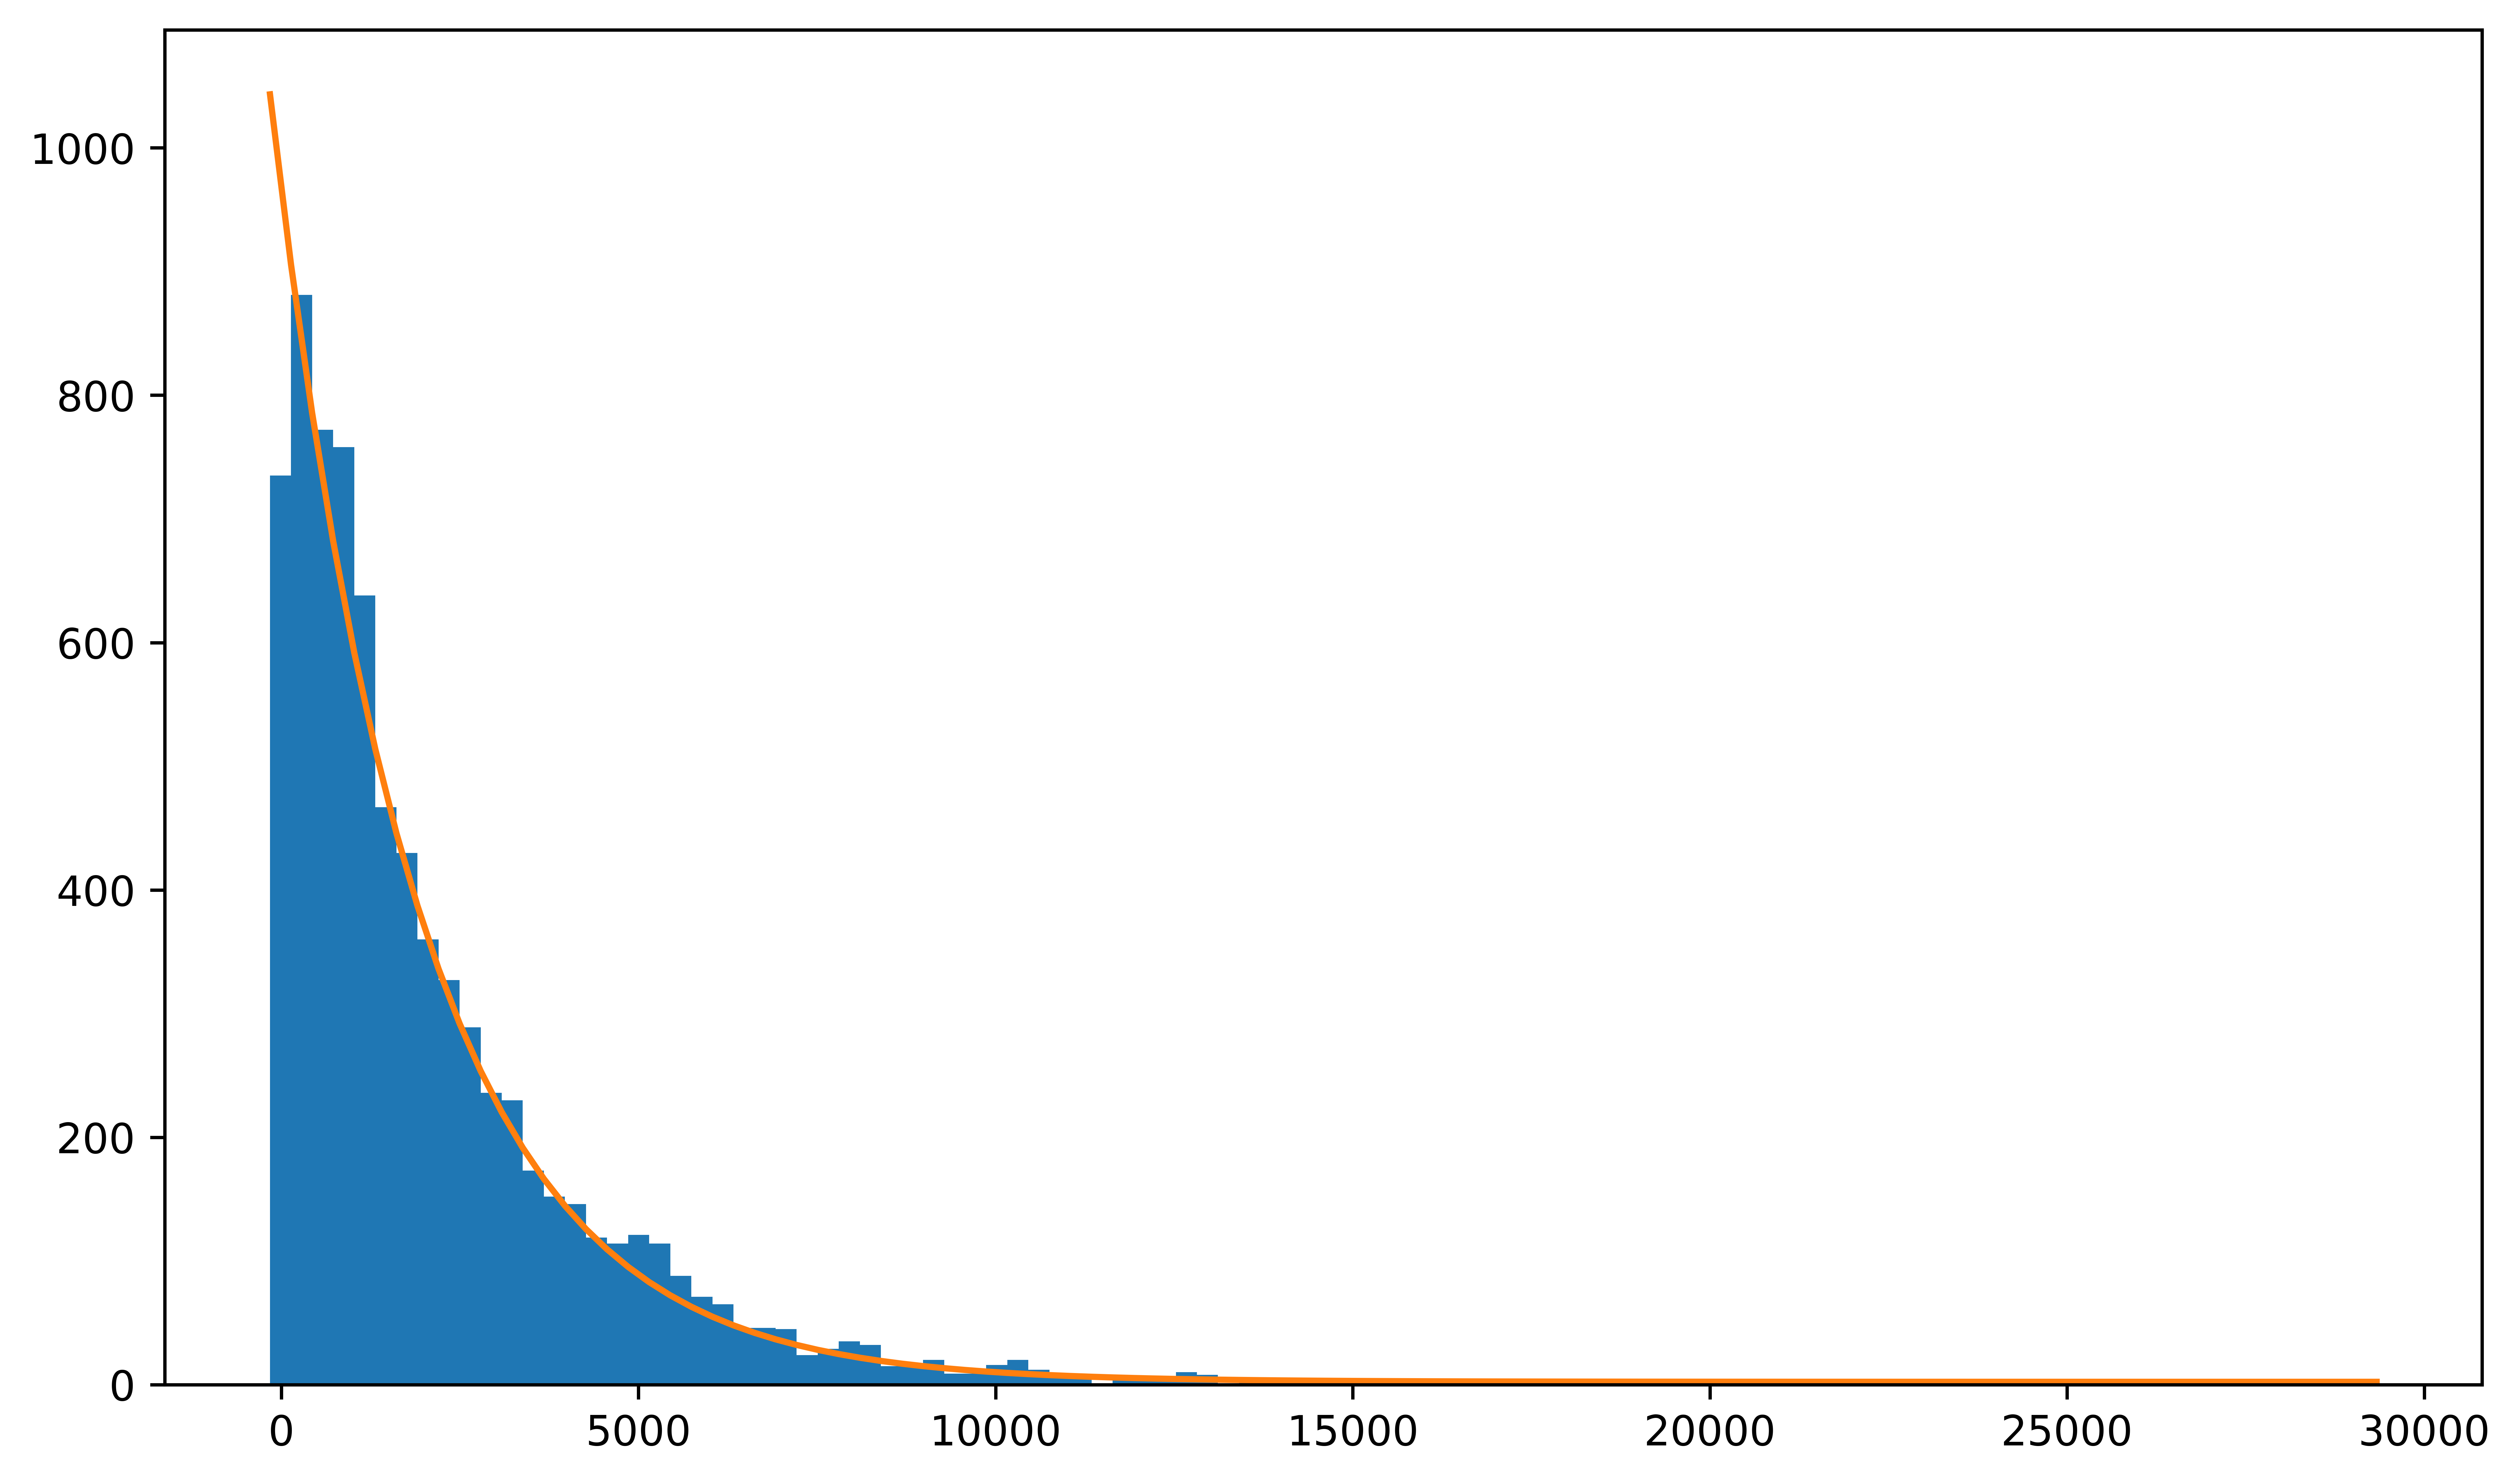

In [153]:
plt.figure(figsize=(10,6), dpi = 1000)
ys, xs , other= plt.hist([i[3] for i in dict_tot[8]], bins = 100)
params, cov = curve_fit(f = exp,xdata = xs[1:(len(xs)-1)],ydata = ys[1:], p0 = (3000,2200,1))

model = [exp(i, *params) for i in xs]
plt.plot(xs,model)

In [48]:
params

array([ 981.33870812, 2063.01418868,    2.11986097])

In [49]:
params, cov = curve_fit(f = exp,xdata = fromhist(xs)[1:],ydata = [i-2 for i in ys[1:]], p0 = (70,2000,0))


In [50]:
params

array([1.06446801e+03, 2.06301529e+03, 1.19835037e-01])

 FCN=73.6404 FROM MIGRAD    STATUS=CONVERGED      89 CALLS          90 TOTAL
                     EDM=1.24788e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.82846e+00   3.18192e-01   1.28903e-03  -1.40766e-03
   2  p1           2.02452e+03   3.47817e+01   9.96798e-02  -1.23524e-05
   3  p2           2.13421e+03   2.77516e+01   7.74078e-02  -1.58188e-05


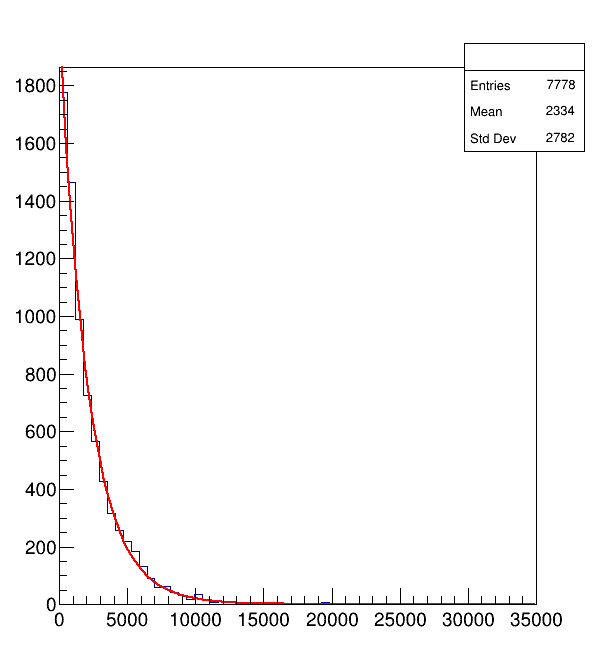

In [162]:
c1 = ROOT.TCanvas("", "", 600, 700)
f1 = ROOT.TF1("f", "[1]*e^(-x/[2])+[0]")
h1 = ROOT.TH1F("","", 60, 0, 35000)
xs2 = [i[3] for i in dict_tot[8]]
h1 = Functions.Create_histo(xs2, "", 60, 0,35000)
f1.SetParameters(120, 10, 2000)
h1.Fit(f1)
h1.Draw()
c1.Draw()

### 01X


In [163]:
canale_8 =[]
for i in frontselect(dict_tot[8]):
    if i[2] ==0:
        canale_8.append(i[3])

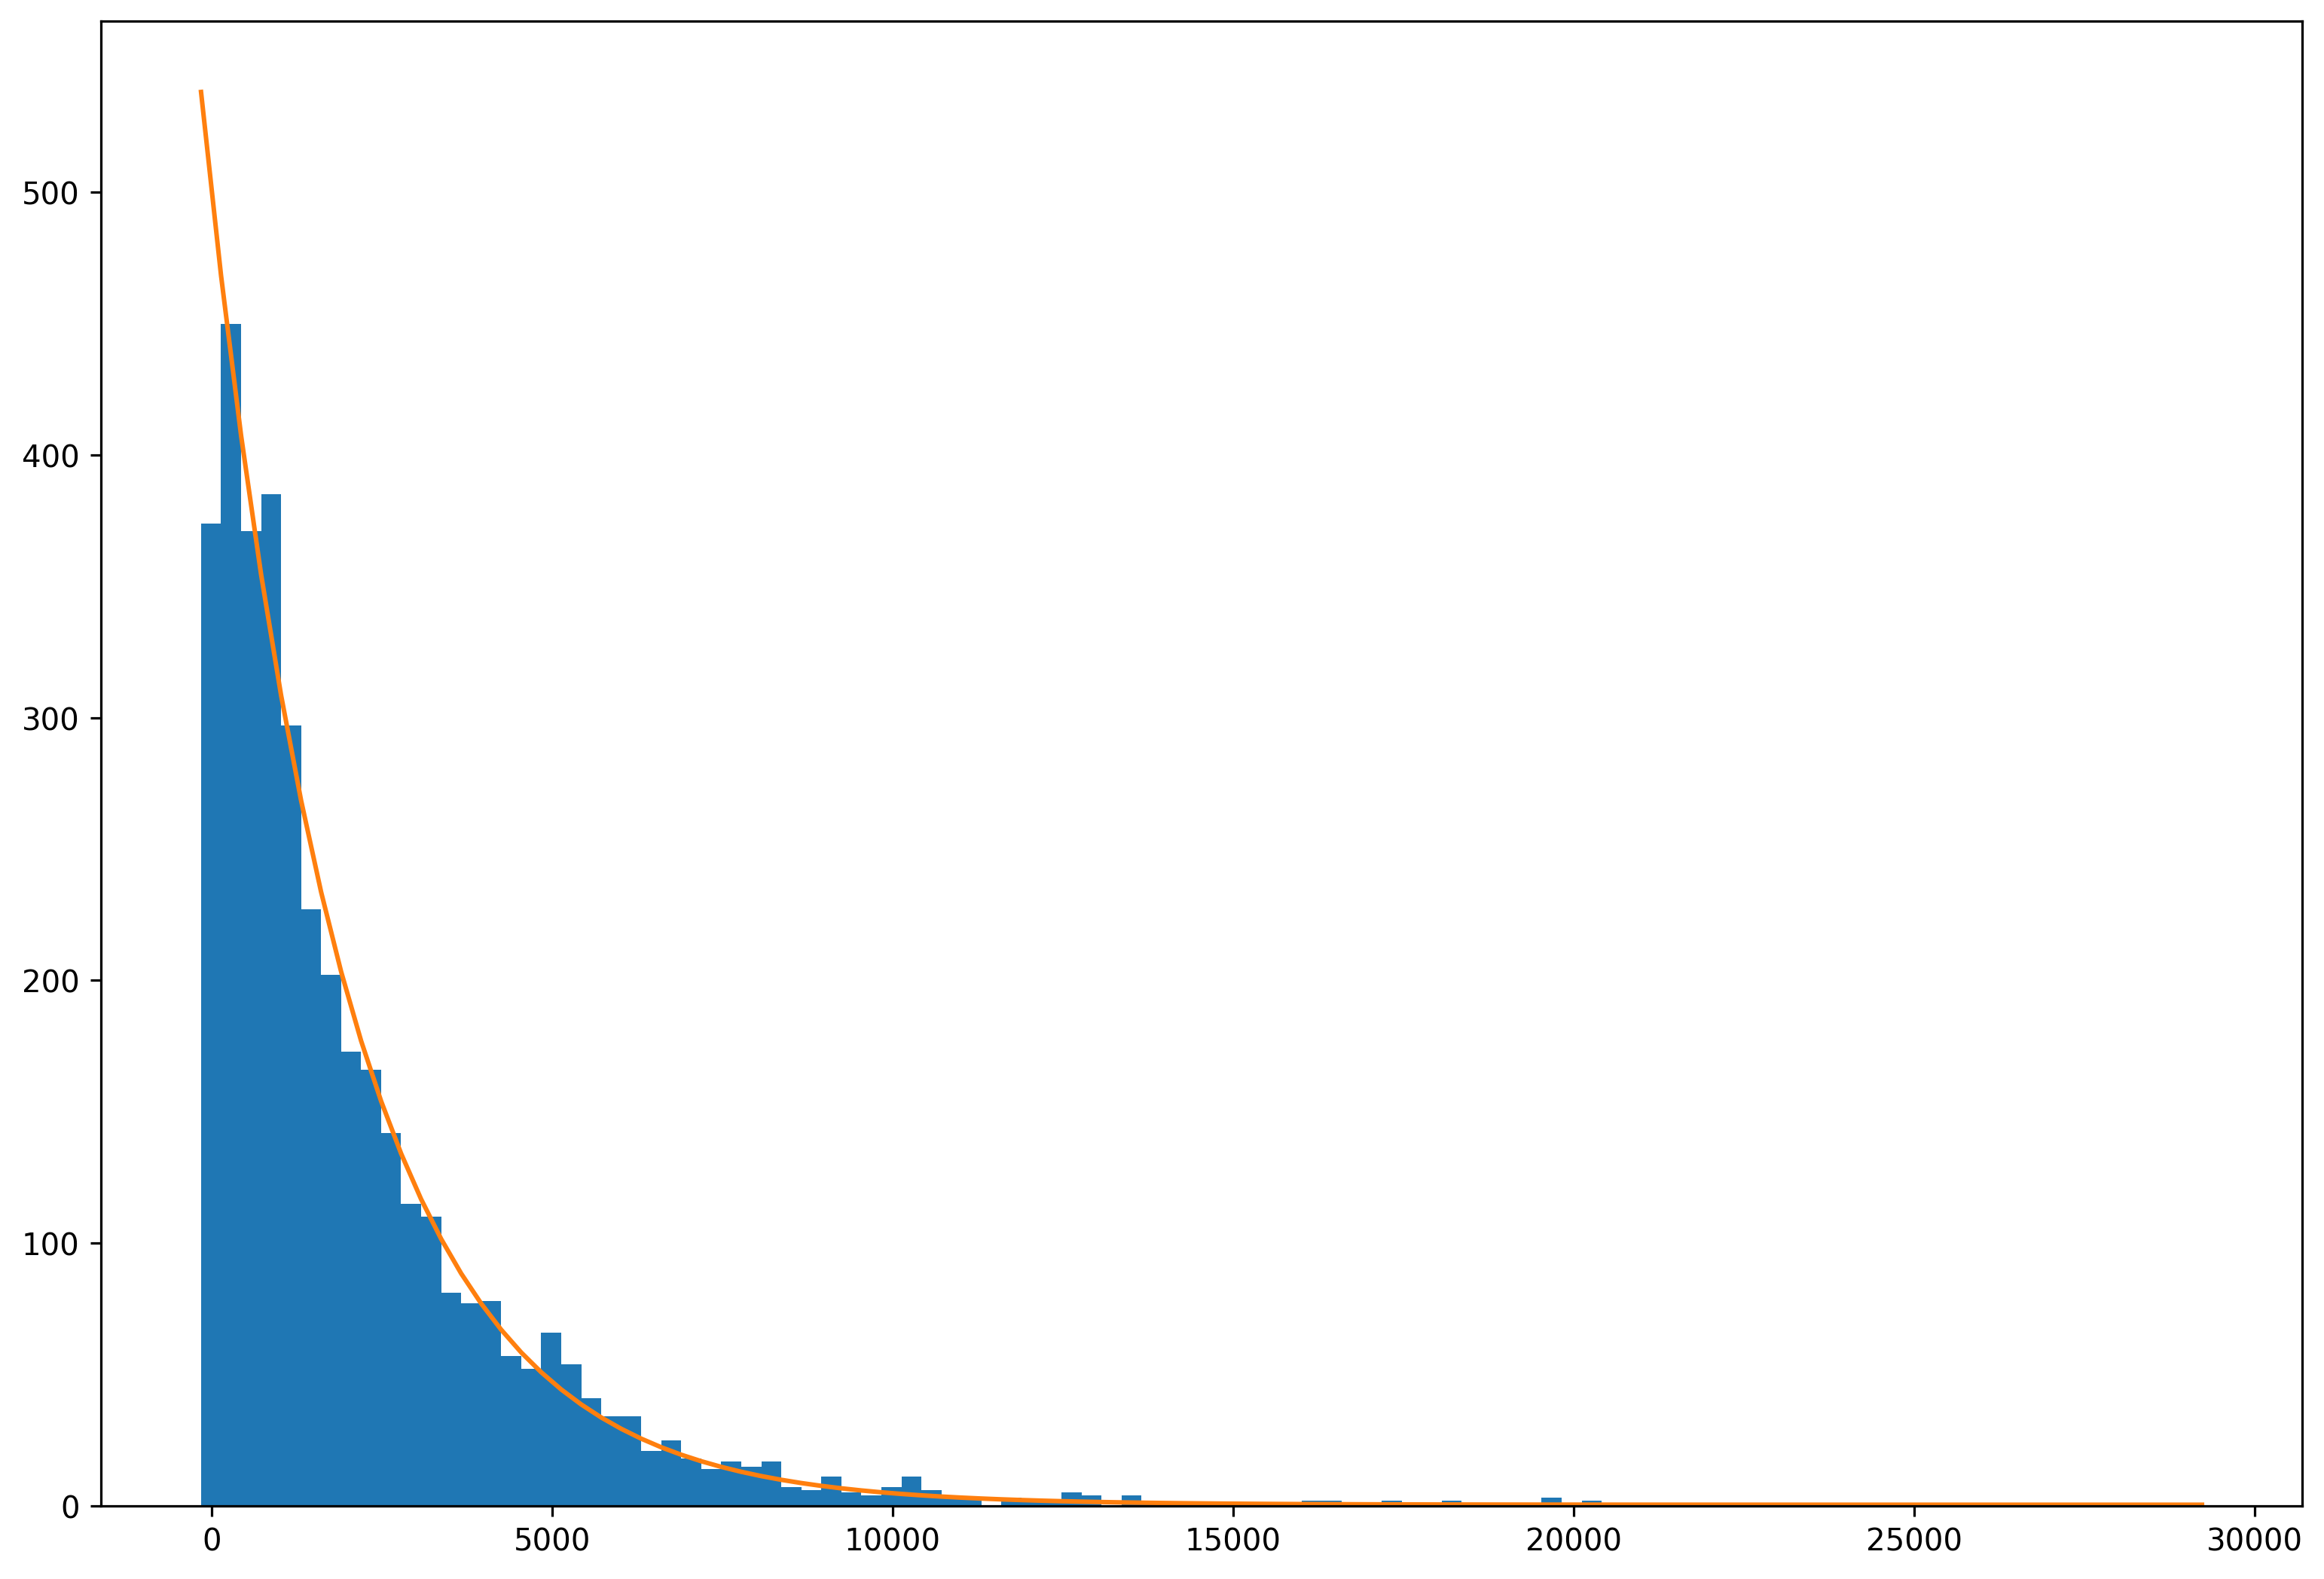

In [164]:
plt.figure(figsize=(13,9), dpi = 290)
ys, xs , other= plt.hist(canale_8, bins = 100)
N8 = sum(ys)
errs = []
for i in ys:
    if i !=0:
        errs.append(np.sqrt((i)*(1-i/N8)))
    else:
        errs.append(1)
params, cov = curve_fit(f = exp,xdata = fromhist(xs)[1:],ydata = ys[1:], p0 = (70,2000,0), sigma = errs[1:])
model = [exp(i, *params) for i in xs]
plt.plot(xs,model)
#plt.xlim(0,1000)

 FCN=35.1717 FROM MIGRAD    STATUS=CONVERGED     116 CALLS         117 TOTAL
                     EDM=1.74603e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.22002e+00   2.64108e-01   7.40003e-04  -1.29735e-03
   2  p1           1.01456e+03   2.51296e+01   4.95803e-02  -3.08842e-05
   3  p2           2.09832e+03   3.99585e+01   7.64156e-02  -1.60489e-05


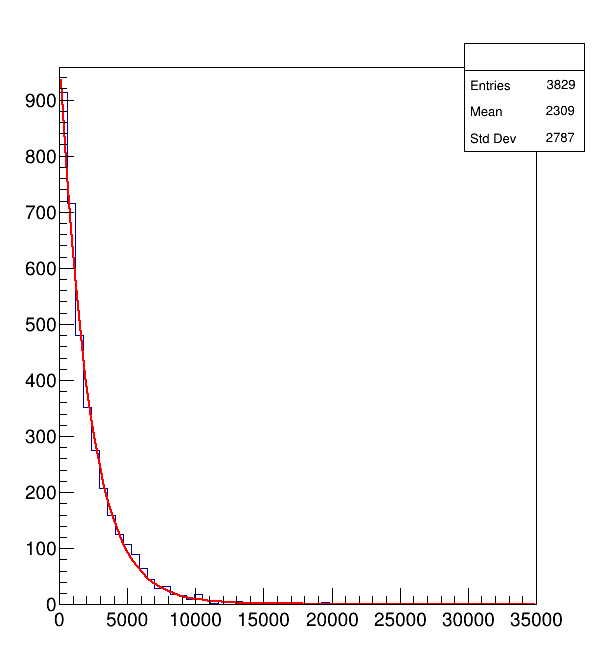

In [166]:
c1 = ROOT.TCanvas("", "", 600, 700)
f1 = ROOT.TF1("f", "[1]*exp(-x/[2])+[0]")
h1 = ROOT.TH1F("","", 60, 0, 35000)
for x in canale_8:
    h1.Fill(x)
f1.SetParameters(120, 10, 2000)
h1.Fit(f1)
h1.Draw()
c1.Draw()

In [167]:
ys

array([374., 450., 371., 385., 297., 227., 202., 173., 166., 142., 115.,
       110.,  81.,  77.,  78.,  57.,  52.,  66.,  54.,  41.,  34.,  34.,
        21.,  25.,  18.,  14.,  17.,  15.,  17.,   7.,   6.,  11.,   5.,
         4.,   7.,  11.,   6.,   4.,   3.,   0.,   3.,   2.,   2.,   5.,
         4.,   0.,   4.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,
         2.,   2.,   0.,   1.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,
         1.,   3.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
         0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
         1.])

In [168]:
params

array([4.99058774e+02, 2.11084905e+03, 3.97295541e-01])

In [169]:
cov

array([[ 1.29299882e+02, -3.05889119e+02,  2.07160036e-01],
       [-3.05889119e+02,  1.31524925e+03, -1.31362047e+00],
       [ 2.07160036e-01, -1.31362047e+00,  1.60645040e-02]])

In [170]:
params

array([4.99058774e+02, 2.11084905e+03, 3.97295541e-01])

In [171]:
cov

array([[ 1.29299882e+02, -3.05889119e+02,  2.07160036e-01],
       [-3.05889119e+02,  1.31524925e+03, -1.31362047e+00],
       [ 2.07160036e-01, -1.31362047e+00,  1.60645040e-02]])

In [172]:
coinc_01x =frontselect(dict_tot[8])
dw_s = frontselect(dict_tot[4])
nevents_down = [i[0] for i in dw_s]
coinc_010 =[]
coinc_011 = []
for i in coinc_01x:
    if i[0] in nevents_down:
        print(i[0])
        coinc_011.append(i)
    else:
        coinc_010.append(i)

941
2316
2788
3358
4588
8100
8633
9607
15165
15652
17153
18905
21695
25241
25754
27235
30346
30957
32845
35461
37875
39455
40844
40866
43473
46649
47215
50842
54469
57773
58677
59352
60505
65036
65482
67388
69906
79000
81221
81961
83025
83788
86291
89826
90115
91213
97198
102363
110082
110936
116083
119233
120495
123645
123771
127363
133398
134308
134925
148329
150756
151277
151333
154544
157196
158940
161789
163103
163402
164948
166070
166462
166810
168418
168887
171315
172133
174183
176938
179601
181630
181752
182182
185264
186295
186584
189191
189788
191153
194867
196165
199210
202222
209127
210154
210372
210545
211466
215889
216266
217762
222528
224536
225637
237328
237488
238487
238868
239674
240779
242330
243958
251946
254598
256512
258550
259244
260014
262428
263404
267736
271026
274006
274010
276085
277067
278126
280412
283127
286255
286486
290840
294305
294463
296903
299445
299508
300847
303882
304739
308467
309054
314216
315643
327931
328997
337116
337605
340441
344510
344874

(array([197.,  52.,  21.,   7.,   3.,   2.,   3.,   1.,   1.,   2.]),
 array([ -149.604,  2788.212,  5726.028,  8663.844, 11601.66 , 14539.476,
        17477.292, 20415.108, 23352.924, 26290.74 , 29228.556]),
 <BarContainer object of 10 artists>)

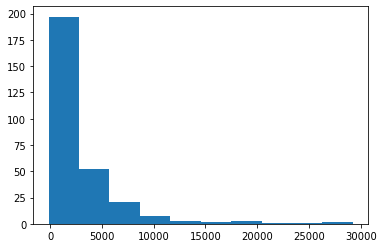

In [173]:
plt.hist([i[3] for  i in coinc_011])

## More than one event


In [177]:
multiple_event ={} #up to two events
multiple_events = {} #more than two events
c= 0 
front_3_trailing = frontselect(dict_tot[3],1)
for i in range(len(front_3_trailing)-1):
    if front_3_trailing[i][0]  == front_3_trailing[i+1][0]:
        n = front_3_trailing[i][0]
        #print(c)
        if c ==0: 
            multiple_event[n] = [front_3_trailing[i]]
            multiple_event[n].append(front_3_trailing[i+1])
            #print(multiple_event[n])
            c+=1
        elif c ==1:
            memory = multiple_event[n]
            #print("memory = "+ str(memory))
            
            multiple_events[n] = memory
            multiple_events[n].append(front_3_trailing[i+1])
            del multiple_event[n]
            c+=1
        else:
            print(n)
            
            multiple_events[n].append(front_3_trailing[i+1])
    else:
        c=0
        
    
        
    

In [178]:
delta_t_csi = []
for i in multiple_event.keys():
    delta_t_csi.append(multiple_event[i][1][3]-multiple_event[i][0][3])

(array([2.30604173e+03, 2.31164793e+03, 1.25718476e+00]),
 array([[ 1.16313495e+04, -7.12361590e+03,  1.13455405e+02],
        [-7.12361590e+03,  5.50927630e+03, -1.06029779e+02],
        [ 1.13455405e+02, -1.06029779e+02,  4.80222386e+00]]))

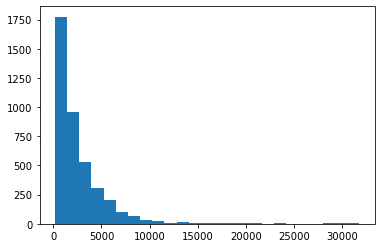

In [189]:
ydcsi, xdcsi , othercsi = plt.hist(delta_t_csi, bins = 25)
curve_fit(exp, fromhist(xdcsi)[1:12], ydcsi[1:12], (70,2000,0), [np.sqrt(i*(1-i/sum(ydcsi[1:12]))) for i in ydcsi[1:12]])

In [190]:
def first_zero(y):
    l = len(y)
    re = -1
    i = 0
    while i<l:

        if y[i] == 0:
            
            re = i
            break
        i = i+1
    
    #if there is no zero, the function returns -1
    if re ==-1:
        print("There's no zero in the list!")
    return re
first_zero(ydcsi)

There's no zero in the list!


-1

 FCN=73.2952 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=4.69411e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.61162e+00   3.19018e-01   1.29757e-03  -5.73247e-04
   2  p1           1.44583e+03   3.24602e+01   9.71118e-02  -9.90250e-06
   3  p2           2.40836e+03   3.91091e+01   1.14177e-01  -1.02462e-05


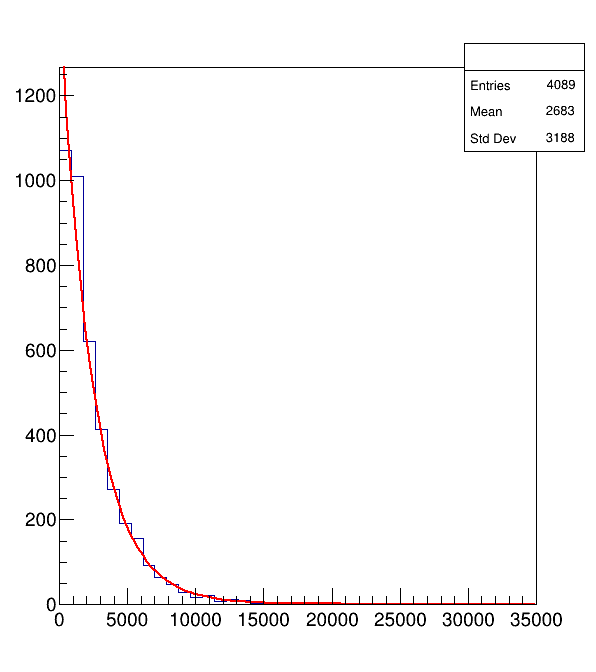

In [200]:
c1 = ROOT.TCanvas("", "", 600, 700)
f1 = ROOT.TF1("f", "[1]*exp(-x/[2])+[0]")
h1 = ROOT.TH1F("","", 40, 0, 35000)
for x in delta_t_csi:
    h1.Fill(x)
f1.SetParameters(1, 1400, 2000)
h1.Fit(f1)
h1.Draw()
c1.Draw()